In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-data/tokenized_dataset.csv
/kaggle/input/thai-news-classification/sanook_news_all.csv
/kaggle/input/news-dataset-cleaned/news_classification_cleaned.csv
/kaggle/input/saraban-light/Sarabun-Light.ttf


In [2]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

file_path = '/kaggle/input/news-dataset-cleaned/news_classification_cleaned.csv'
df = pd.read_csv(file_path)

df

Title         Date  \
0               คนไทยเฮ รัฐบาลจัดให้ หยุดยาวปีใหม่ 5 วัน   15 ต.ค. 56   
1      เอาฮาไปไหน เมื่อ ชาวเน็ต เปลี่ยนมอเตอร์ไซค์ให้...   3 มี.ค. 58   
2      เลือกตั้ง 2562 ธนาธรไม่รอด กกต มีมติแจ้งข้อหา ...  23 เม.ย. 62   
3      ปารีณา ไกรคุปต์ คือใคร โซเชียลสืบประวัติไม่ธรร...   29 พ.ค. 62   
4                        เปิดโผรัฐมนตรี รัฐบาลยิ่งลักษณ์    9 ส.ค. 54   
...                                                  ...          ...   
11659  ออกหมายจับ 2 มือเผาทั้งเป็น หนุ่ม 18 ผู้เป็นย่...   29 ธ.ค. 57   
11660  ด่วน กระติก รับสารภาพแล้วให้การเท็จ เตรียมนำตั...   4 เม.ย. 65   
11661  สลด เด็กหญิงผูกคอดับประชดรัก หลังโพสต์ภาพลงโซเ...  25 มี.ค. 59   
11662  นิติกรหนุ่มขอเงินไม่ได้ ยิงพี่เขยดับต่อหน้าพี่สาว    2 ก.ย. 56   
11663  ครอบครัวรับศพ ดรวันชัย เดือดฉีกสมุดนักข่าวปมถ่...   20 พ.ค. 59   

         Views      Label                                 Tokenized_sentence  
0       90,604   การเมือง  ['คน', 'ไทย', 'เฮ', 'รัฐบาล', 'จัด', 'ให้', 'ห...  
1       67,528   การเมือง  ['เอา', 'ฮา', 'ไป', 'ไหน', 'เมื่อ', 'ชาว', 'เน...  
2       53,661   การเมือง  ['เลือกตั้ง', '2562', 'ธนาธร', 'ไม่', 'รอด', '...  
3      115,286   การเมือง  ['ปารีณา', 'ไกรคุปต์', 'คือ', 'ใคร', 'โซเชียล'...  
4      101,279   การเมือง  ['เปิด', 'โผ', 'รัฐมนตรี', 'รัฐบาล', 'ยิ่งลักษ...  
...        ...        ...                                                ...  
11659  149,761  อาชญากรรม  ['ออก', 'หมาย', 'จับ', '2', 'มือ', 'เผา', 'ทั้...  
11660  252,799  อาชญากรรม  ['ด่วน', 'กระติก', 'รับ', 'สารภาพ', 'แล้ว', 'ใ...  
11661  118,659  อาชญากรรม  ['สลด', 'เด็ก', 'หญิง', 'ผูก', 'คอ', 'ดับ', 'ป...  
11662  408,487  อาชญากรรม  ['นิติกร', 'หนุ่ม', 'ขอ', 'เงิน', 'ไม่', 'ได้'...  
11663  145,291  อาชญากรรม  ['ครอบครัว', 'รับ', 'ศพ', 'ดรวัน', 'ชัย', 'เดื...  

[11664 rows x 5 columns]

In [4]:
display(df.describe())
label_counts = df['Label'].value_counts()

print(label_counts)

Title       Date   Views  \
count                                        11664      11664   11664   
unique                                       11663       5587   11397   
top     สิ่งต้องห้าม ที่คนขับรถเกียร์ออโต้ไม่ควรทำ  4 ก.พ. 54  62,155   
freq                                             2         22       4   

           Label                                 Tokenized_sentence  
count      11664                                              11664  
unique        10                                              11663  
top     การเมือง  ['สิ่ง', 'ต้อง', 'ห้าม', 'ที่', 'คน', 'ขับ', '...  
freq        1200                                                  2

Label
การเมือง       1200
ข่าวกีฬา       1200
ข่าวไอที       1200
ข่าวบันเทิง    1200
ข่าวรถยนต์     1200
ข่าวเกมส์      1200
อาชญากรรม      1200
สุขภาพ         1200
ข่าวการเงิน    1039
ดูดวง          1025
Name: count, dtype: int64


In [5]:
df = df.drop_duplicates(subset=['Title'])

display(df)

Title         Date  \
0               คนไทยเฮ รัฐบาลจัดให้ หยุดยาวปีใหม่ 5 วัน   15 ต.ค. 56   
1      เอาฮาไปไหน เมื่อ ชาวเน็ต เปลี่ยนมอเตอร์ไซค์ให้...   3 มี.ค. 58   
2      เลือกตั้ง 2562 ธนาธรไม่รอด กกต มีมติแจ้งข้อหา ...  23 เม.ย. 62   
3      ปารีณา ไกรคุปต์ คือใคร โซเชียลสืบประวัติไม่ธรร...   29 พ.ค. 62   
4                        เปิดโผรัฐมนตรี รัฐบาลยิ่งลักษณ์    9 ส.ค. 54   
...                                                  ...          ...   
11659  ออกหมายจับ 2 มือเผาทั้งเป็น หนุ่ม 18 ผู้เป็นย่...   29 ธ.ค. 57   
11660  ด่วน กระติก รับสารภาพแล้วให้การเท็จ เตรียมนำตั...   4 เม.ย. 65   
11661  สลด เด็กหญิงผูกคอดับประชดรัก หลังโพสต์ภาพลงโซเ...  25 มี.ค. 59   
11662  นิติกรหนุ่มขอเงินไม่ได้ ยิงพี่เขยดับต่อหน้าพี่สาว    2 ก.ย. 56   
11663  ครอบครัวรับศพ ดรวันชัย เดือดฉีกสมุดนักข่าวปมถ่...   20 พ.ค. 59   

         Views      Label                                 Tokenized_sentence  
0       90,604   การเมือง  ['คน', 'ไทย', 'เฮ', 'รัฐบาล', 'จัด', 'ให้', 'ห...  
1       67,528   การเมือง  ['เอา', 'ฮา', 'ไป', 'ไหน', 'เมื่อ', 'ชาว', 'เน...  
2       53,661   การเมือง  ['เลือกตั้ง', '2562', 'ธนาธร', 'ไม่', 'รอด', '...  
3      115,286   การเมือง  ['ปารีณา', 'ไกรคุปต์', 'คือ', 'ใคร', 'โซเชียล'...  
4      101,279   การเมือง  ['เปิด', 'โผ', 'รัฐมนตรี', 'รัฐบาล', 'ยิ่งลักษ...  
...        ...        ...                                                ...  
11659  149,761  อาชญากรรม  ['ออก', 'หมาย', 'จับ', '2', 'มือ', 'เผา', 'ทั้...  
11660  252,799  อาชญากรรม  ['ด่วน', 'กระติก', 'รับ', 'สารภาพ', 'แล้ว', 'ใ...  
11661  118,659  อาชญากรรม  ['สลด', 'เด็ก', 'หญิง', 'ผูก', 'คอ', 'ดับ', 'ป...  
11662  408,487  อาชญากรรม  ['นิติกร', 'หนุ่ม', 'ขอ', 'เงิน', 'ไม่', 'ได้'...  
11663  145,291  อาชญากรรม  ['ครอบครัว', 'รับ', 'ศพ', 'ดรวัน', 'ชัย', 'เดื...  

[11663 rows x 5 columns]

การเมือง


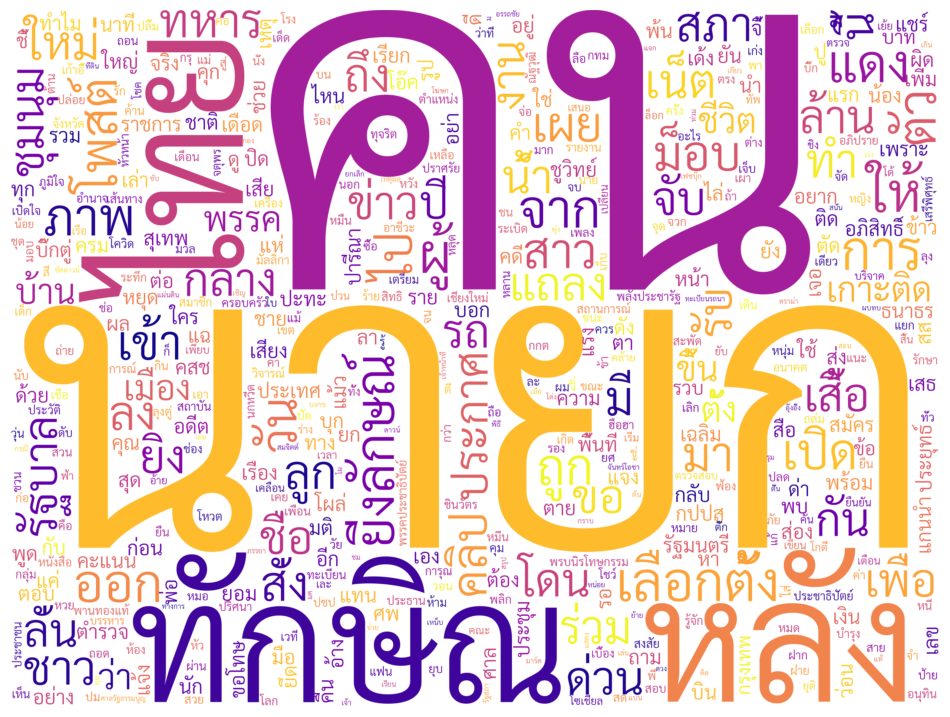

ข่าวการเงิน


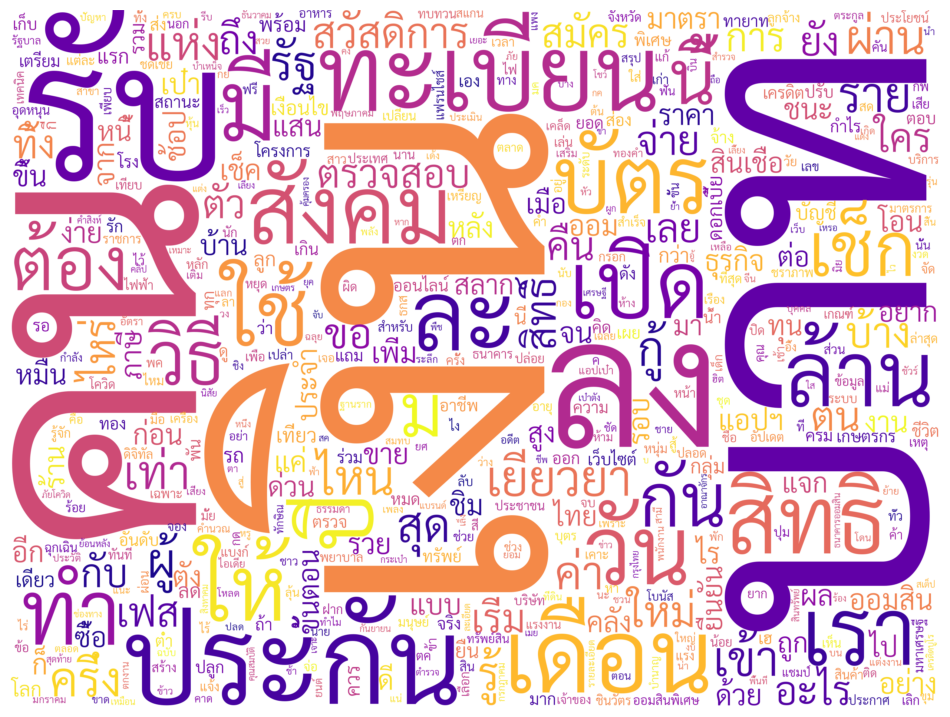

ข่าวกีฬา


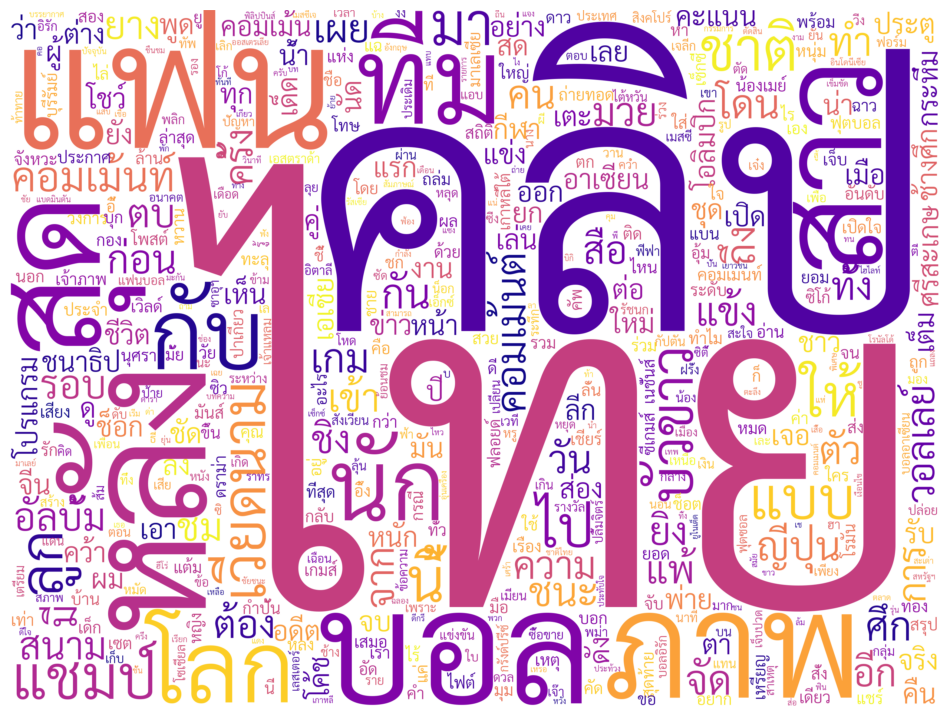

ข่าวบันเทิง


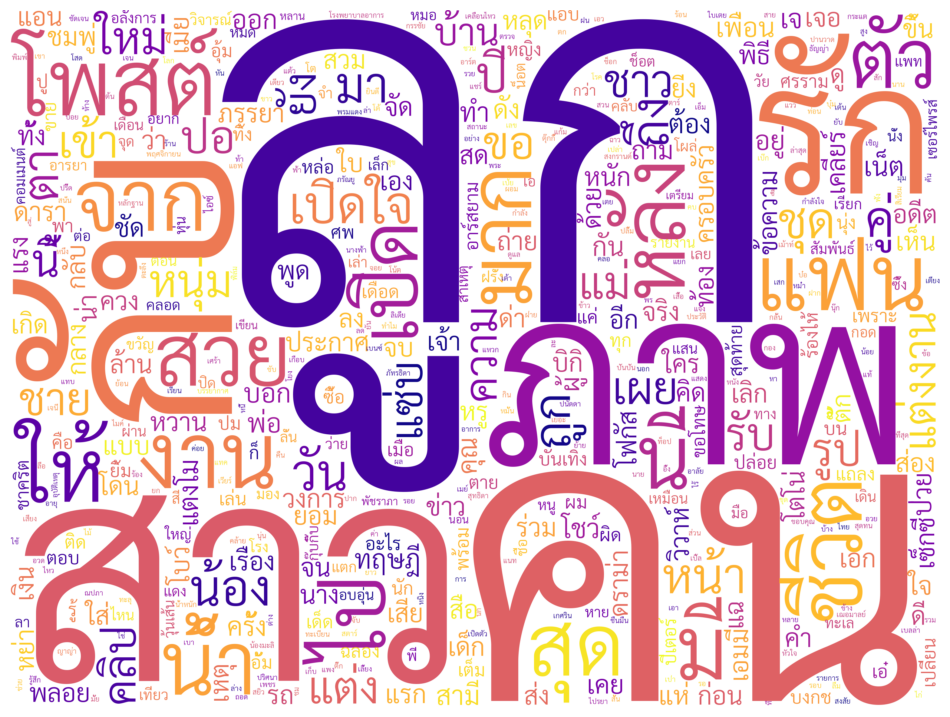

ข่าวรถยนต์


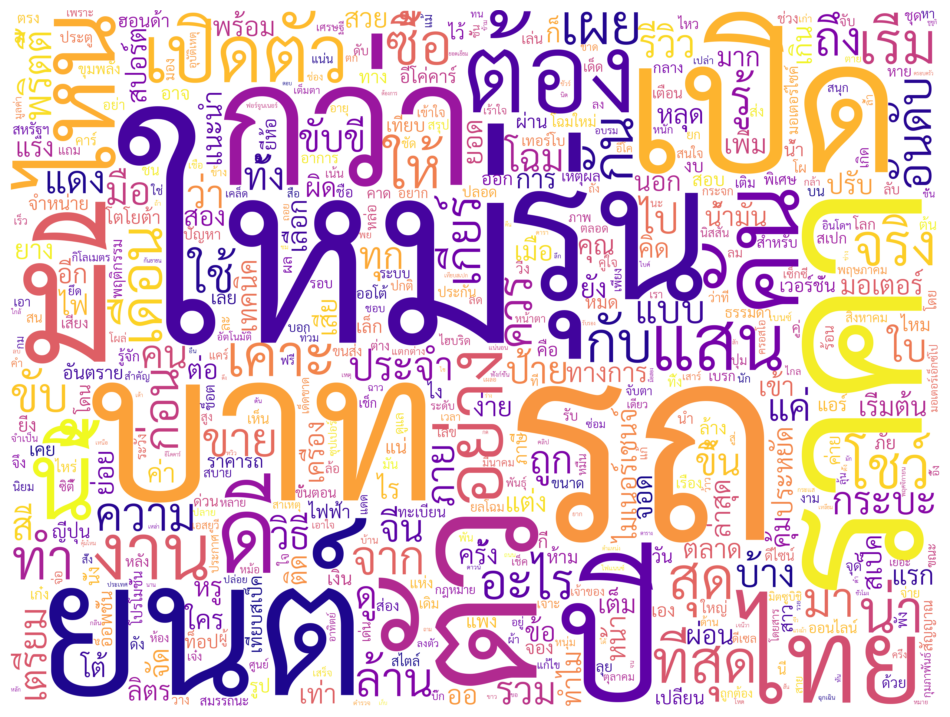

ข่าวเกมส์


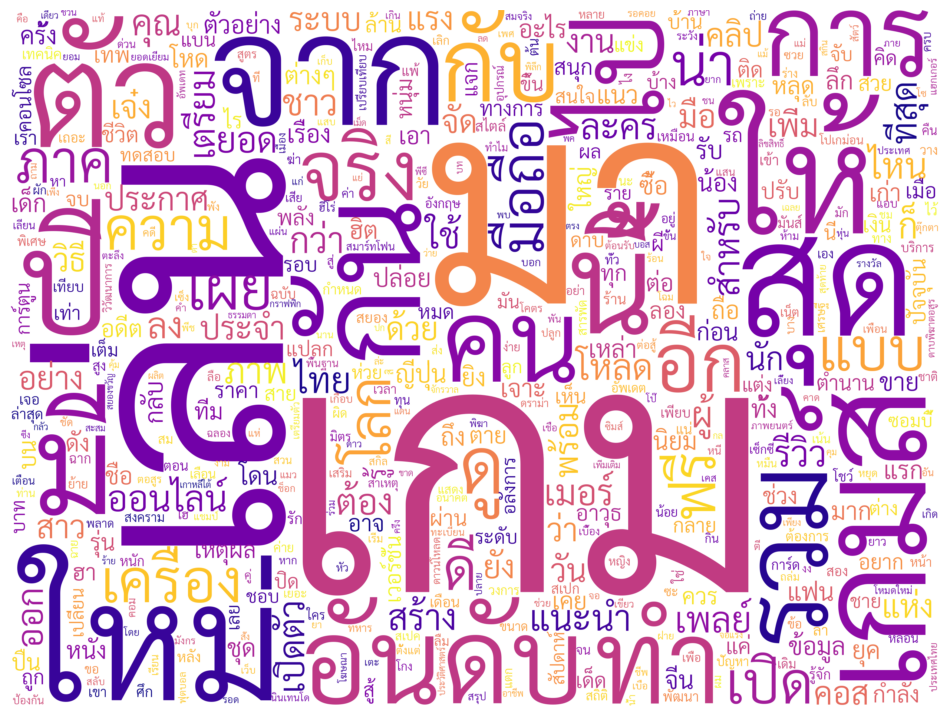

ข่าวไอที


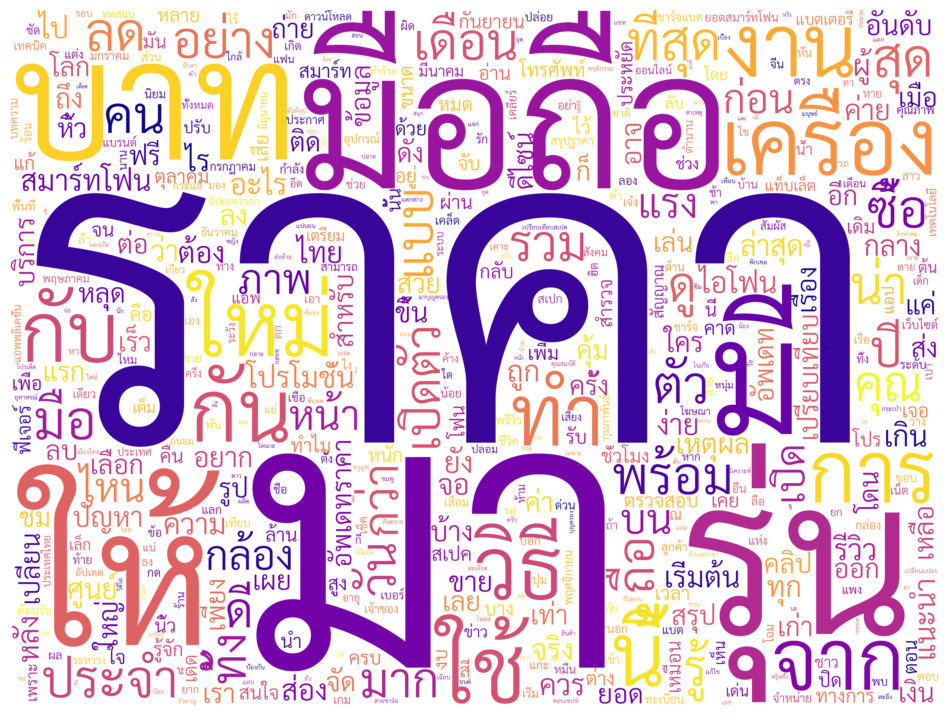

ดูดวง


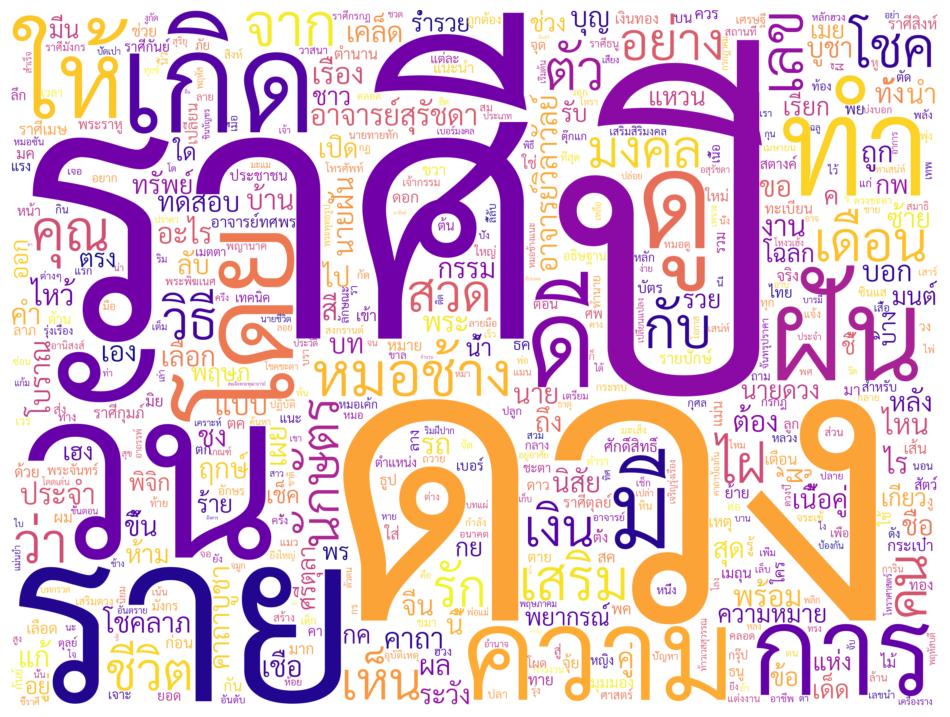

สุขภาพ


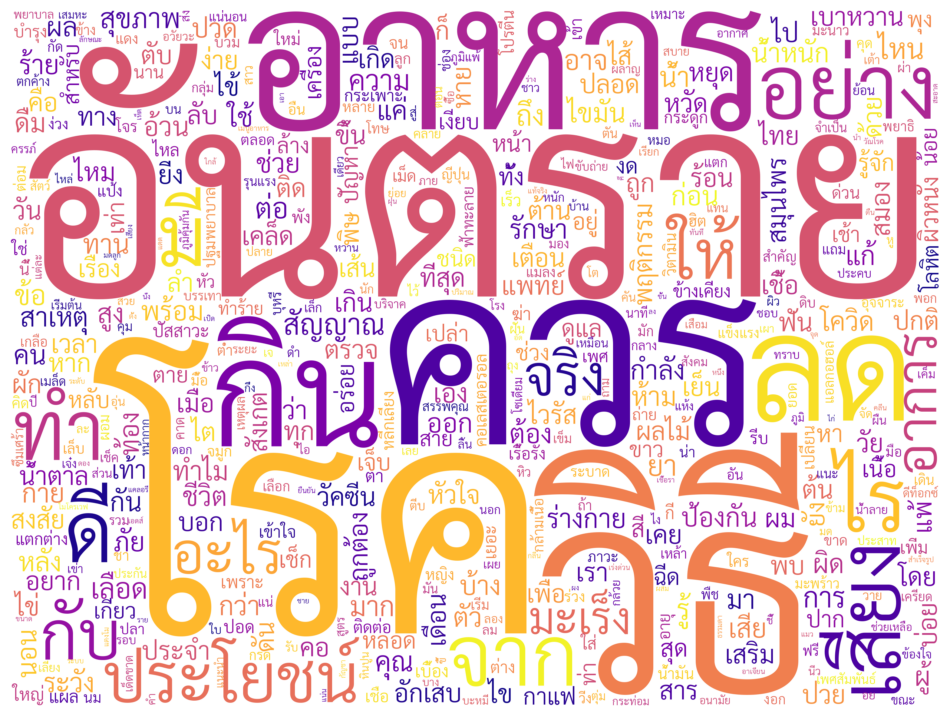

อาชญากรรม


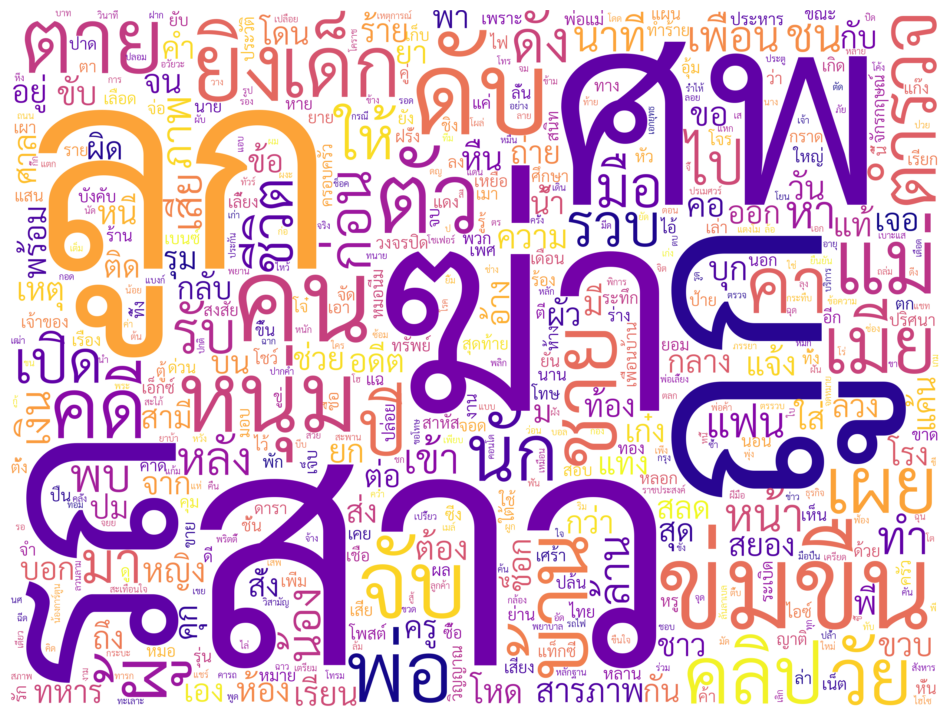

In [6]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def thai_stopwords():
    return set(['และ', 'แต่', 'หรือ', 'ที่', 'เป็น', 'ได้', 'ใน', 'ของ', 'ไม่', 'ซึ่ง', 'ตาม', 'สิ่ง', 'จะ', 'แล้ว', 'ๆ', 'ฯ'])

path = '/kaggle/input/saraban-light/Sarabun-Light.ttf' 

labels = df['Label'].unique() 

for label in labels:
    text = ' '.join(df[df['Label'] == label]['Tokenized_sentence'])
    text = re.sub(r'[a-zA-Z]+', '', text)
    
    wordcloud = WordCloud(
        font_path=path,  # font ที่เราต้องการใช้ในการแสดงผล
        stopwords=thai_stopwords(), 
        relative_scaling=0.3,
        min_font_size=1,
        background_color="white",
        width=1024,
        height=768,
        max_words=500, 
        colormap='plasma',
        scale=3,
        font_step=4,
        collocations=False,
        regexp=r"[ก-๙a-zA-Z]+",  
        margin=2
    ).generate(text) 

    # แสดงผล Word Cloud
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
#     plt.title(f"Word Cloud for Label: {label}")  
    print(label)
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Tokenized_sentence'], df['Label'], test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape)
# print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(9330,) (9330,)
(2333,) (2333,)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TfidfVectorizer to fit and transform both the training and test sets
vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, ngram_range=(1, 2))

# Fit on training data and transform both training and test data
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit on training set
X_test_tfidf = vectorizer.transform(X_test)  

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid = {'alpha': [0.01, 0.1, 1, 10]}

mnb = MultinomialNB()

grid_search = GridSearchCV(mnb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_mnb = grid_search.best_estimator_

test_pred = best_mnb.predict(X_test_tfidf)
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print("Test Classification Report:")
print(classification_report(y_test, test_pred))


Best parameters found:  {'alpha': 0.1}
Test Accuracy: 0.8298328332618946
Test Classification Report:
              precision    recall  f1-score   support

    การเมือง       0.79      0.74      0.77       247
 ข่าวการเงิน       0.86      0.78      0.82       214
    ข่าวกีฬา       0.82      0.84      0.83       236
 ข่าวบันเทิง       0.77      0.79      0.78       260
  ข่าวรถยนต์       0.85      0.84      0.85       237
   ข่าวเกมส์       0.89      0.84      0.87       236
    ข่าวไอที       0.83      0.81      0.82       231
       ดูดวง       0.97      0.85      0.91       205
      สุขภาพ       0.85      0.93      0.89       241
   อาชญากรรม       0.73      0.88      0.80       226

    accuracy                           0.83      2333
   macro avg       0.84      0.83      0.83      2333
weighted avg       0.83      0.83      0.83      2333



In [10]:
pip install attacut

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114248 sha256=8a3eef34ccc070aba29912918dbb1e6004fd3d1fba849a33c8f996256247d4a8
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
Note: you may need to restart the kernel to use updated packages.


In [11]:

import attacut

new_texts = [
    # politics
    "รวมไทยสร้างชาติ โต้ “สนธิญาณ” ไม่ได้ทรยศจิตวิญญาณ “ลุงตู่” แก้ รธน. ยึดหลักเกณฑ์เดิม",
    "โปรดเกล้าฯ พล.ต.อ.กิตติ์รัฐ พันธุ์เพ็ชร์ เป็น ผบ.ตร. คนที่ 15",
    "“อนุสรณ์” มั่นใจ เพื่อไทยแจงได้ ไม่กังวลถูกยื่นยุบพรรค ปม “ทักษิณ” ครอบงำ",
    # crime
    "รวบ เจ้าหน้าที่รัฐ อดีตชุดปฏิบัติการพิเศษ ลักทรัพย์เงินหลวงกว่า 10 ล้าน หลบหนี",
    "จับสาวหลอกขายประกัน เจ้าอาวาส หลังซื้อให้โยมแม่ สารภาพนำเงินค่าเบี้ยไปใช้เอง",
    "กสม.ชี้คดี สารวัตรกานต์ ตร.ชุดระงับเหตุ ละเมิดสิทธิมนุษยชน",
    # Entertainment
    "ปังไม่หยุด ลิซ่า เปิดตัวเพลง Moonlit Floor ในเทศกาลดนตรี",
    "เกิดอะไรขึ้น แจง เมียแจ๊ส ประกาศขายคอนโดหรู ราคาสูง ใครเห็นก็เสียดายแทน",
    "แจ็ค-ใบหม่อน เผยชื่อจริง น้องคากิ ที่ หมอช้าง ตั้งให้ พร้อมเผยความหมาย",
    # Sport
    "แฟนบอลสงขลาแห่ซื้อตั๋วชมคิงส์คัพ ไทย - ฟิลิปปินส์",
    "คึกคัก แฟนบอลร่วมชมแข้งทีมชาติฝึกซ้อม เตรียมสู้ศึกคิงส์ คัพ ครั้งที่ 50",
    "“ช้างศึก” พ่าย “ฝรั่งเศส” 2-5 ตกรอบ 16 ทีม ศึกฟุตซอลชิงแชมป์โลก 2024",
    # health
    "อย่าหาทำ! 7 ความเชื่อผิด ๆ สำหรับคุณแม่หลังคลอด",
    "ครั้งแรกในไทย! พบหมู่โลหิตพิเศษ Rh+(Asian-type DEL) สภากาชาด ชวนปชช. หมู่เลือด Rh- บริจาคโลหิตคัดกรอง Rh+",
    "อย. ตรวจพบ ซิลเดนาฟิล ในอาหารเสริมแบรนด์ดัง เสี่ยงอันตรายถึงขั้นเสียชีวิต",
    # horoscope
    "แรงดาววิปริต เตือน 4 ราศี ตั้งแต่ 19 ตุลาคม นี้ มีหลายเรื่องต้องระมัดระวัง",
    "หมอช้าง เปิดราศี ช่วง 3 เดือนสุดท้าย ราศีพ้นเคราะห์ ราศีดวงแรง ราศีระวังอุบัติเหตุ",
    "ดูดวงราศี ดาวศุกร์ย้ายส่งผลดี เรื่องร้ายคลี่คลาย มีเกณฑ์รวยติดจรวด ได้เงินคืนมา",
    # car
    "ตารางผ่อน Mitsubishi Triton Athlete 2024-2025 กระบะตัวแต่งยกสูง",
    "รถไฟฟ้า Tesla รีวิวทุกรุ่นในไทย ราคาเท่าไหร่ รุ่นไหนน่าสนใจบ้าง",
    "วิธีเช็ครถก่อนเดินทางไกลง่ายๆ ด้วยตัวเอง",
    # it
    "ยืนยัน ! iPad mini (2024) มาพร้อมแรม 8 GB: จากการทดสอบบน Geekbench",
    "Honor เปิดตัว X7c ขุมพลัง Snapdragon 4 Gen 2, กล้อง 108 ล้านพิกเซล, แบตเตอรี่ 6,000 mAh",
    "นักวิจัยจีนใช้คอมพิวเตอร์ควอนตัมเจาะระบบการเข้ารหัส SPN ที่ใช้แพร่หลายในปัจจุบันได้สำเร็จ",
    # games
    "คำสั่ง Minecraft ที่เป็นประโยชน์ต่อการเล่น และควบคุมเซิร์ฟเวอร์",
    "อดีตผู้บริหาร PlayStation มองว่าการแข่งขันเรื่องความแรงของคอนโซล มาถึงจุดอิ่มตัวแล้ว และผู้ชนะคือ AMD",
    "รวมสูตรโกง GTA V ใน PC และ Console อัพเดทใหม่",
    # finance
    "ออมสิน - ธอส. ลดดอกเบี้ยกู้ 0.25% มีผล 1 พ.ย. แต่ยังตรึงดอกเบี้ยเงินฝากส่งเสริมการออม",
    "รมว.คลัง ถกเรื่องดอกเบี้ยกับแบงก์ชาติสัปดาห์หน้า- “เผ่าภูมิ” ระบุ ต้องดูกรอบเงินเฟ้อประกอบ",
    "การเงินติดลบ-เน้นใช้จ่ายคุ้มค่า ไลน์-นีลเส็น เผยคนไทยติดแบรนด์ลดลง"
]

# ตัดคำในข้อความ
tokenized_new_texts = [' '.join(attacut.tokenize(text)) for text in new_texts]

# แปลงข้อความที่ตัดคำแล้วเป็นแบบ TF-IDF
new_texts_tfidf = vectorizer.transform(tokenized_new_texts)

# ใช้โมเดลในการทำนาย และคืนค่าความน่าจะเป็นของแต่ละคลาส
predictions = best_mnb.predict(new_texts_tfidf)
probabilities = best_mnb.predict_proba(new_texts_tfidf)

# สร้าง mapping จากดัชนีไปยังชื่อคลาส
class_names = best_mnb.classes_

# แสดงผลการทำนายพร้อมความน่าจะเป็นของแต่ละคลาส
for text, category, prob in zip(new_texts, predictions, probabilities):
    class_index = list(class_names).index(category)
    print(f"ข้อความ: '{text}' => หมวดหมู่: {category} (ความน่าจะเป็น: {prob[class_index] * 100:.2f}%)")
    print("ความน่าจะเป็นต่อคลาส:")
    for i, p in enumerate(prob):
        print(f"  - {class_names[i]}: {p * 100:.2f}%")
    print("-" * 40)



/opt/conda/lib/python3.10/site-packages/attacut/models/__init__.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locatio

ข้อความ: 'รวมไทยสร้างชาติ โต้ “สนธิญาณ” ไม่ได้ทรยศจิตวิญญาณ “ลุงตู่” แก้ รธน. ยึดหลักเกณฑ์เดิม' => หมวดหมู่: การเมือง (ความน่าจะเป็น: 74.48%)
ความน่าจะเป็นต่อคลาส:
  - การเมือง: 74.48%
  - ข่าวการเงิน: 1.45%
  - ข่าวกีฬา: 6.06%
  - ข่าวบันเทิง: 0.34%
  - ข่าวรถยนต์: 0.61%
  - ข่าวเกมส์: 9.76%
  - ข่าวไอที: 0.85%
  - ดูดวง: 2.62%
  - สุขภาพ: 2.17%
  - อาชญากรรม: 1.66%
----------------------------------------
ข้อความ: 'โปรดเกล้าฯ พล.ต.อ.กิตติ์รัฐ พันธุ์เพ็ชร์ เป็น ผบ.ตร. คนที่ 15' => หมวดหมู่: การเมือง (ความน่าจะเป็น: 44.92%)
ความน่าจะเป็นต่อคลาส:
  - การเมือง: 44.92%
  - ข่าวการเงิน: 23.84%
  - ข่าวกีฬา: 1.14%
  - ข่าวบันเทิง: 3.41%
  - ข่าวรถยนต์: 5.45%
  - ข่าวเกมส์: 4.79%
  - ข่าวไอที: 2.27%
  - ดูดวง: 2.29%
  - สุขภาพ: 1.11%
  - อาชญากรรม: 10.78%
----------------------------------------
ข้อความ: '“อนุสรณ์” มั่นใจ เพื่อไทยแจงได้ ไม่กังวลถูกยื่นยุบพรรค ปม “ทักษิณ” ครอบงำ' => หมวดหมู่: การเมือง (ความน่าจะเป็น: 91.71%)
ความน่าจะเป็นต่อคลาส:
  - การเมือง: 91.71%
  - ข่าวการเงิน: 1.47%
  

In [12]:
import pickle

model_path = '/kaggle/working/model_tfidfNaive.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(best_mnb, file)


In [13]:
import pickle

# เซฟโมเดล
model_path = '/kaggle/working/model_tfidfNaive.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(best_mnb, file)

# เซฟ TF-IDF vectorizer
vectorizer_path = '/kaggle/working/vectorizer.pkl'
with open(vectorizer_path, 'wb') as file:
    pickle.dump(vectorizer, file)
